#  Dynamic Portfolio Choice Model #4c

###  Dynamic models with multidimensional integrals

**Readings:** 
- 📖 Cocco, Gomes, and Maenhout (2005) “Consumption and Portfolio Choice over the Life Cycle”, *Review of Financial Studies*, Vol. 18(2), pp. 491-533.

by Bertel Schjerning

University of Copenhagen


## Dynamic Portfolio Choice Model

- An individual or household **allocates resources each period** between:
  - **Consumption**
  - **Savings**, which are invested in a **portfolio of risky and risk-free assets**.

- The household receives **stochastic labor income** $y_t$ at the beginning of each period:
  - **Income is stochastic** – observed *before* making consumption and portfolio decisions.
  - **Asset returns are stochastic** – observed *after* decisions are made.
  - **Borrowing and shorting are not allowed**.

- The objective is to **maximize the expected lifetime utility of consumption**  
  subject to **income and asset return uncertainty**.

- We now formalize the primitives of the model within the general MDP framework:  
  $$
  V_t(s_t) = \max_{d_t \in D(s_t)} \left[ u_t(s_t, d_t) + \beta \int V_{t+1}(s_{t+1}) p(ds_{t+1} \mid s_t, d_t) \right]
  $$

## States and Decisions

- **States:**  
  - Single state variable, **cash on hand**: $s_t = x_t = A_t + y_t$
    - $x_t$ is the **total available resources** at the beginning of period $t$.
    - $y_t$ is **stochastic labor income**, observed **before** consumption and portfolio choices.
    - $A_t$ represents **financial assets before income is realized**.
    - **Borrowing is not allowed**: $A_t \ge0$.

- **Choices:**  
  - **Consumption:** $c_t$, with $c_t \in [0, x_t]$.
  - **Portfolio allocation:** $\boldsymbol{w}_t = (w_t^{(1)}, ..., w_t^{(N)}) \in W$:
    - $\{w_t^{(i)}\}_{i=1}^{N}$ are the **portfolio weights on the $N$ risky assets** (e.g., stocks, real estate, government bonds).
    - The **portfolio choice set** $W$ is defined as:
      $$
      W = \left\{ \boldsymbol{w}_t = (w_t^{(1)}, \dots, w_t^{(N)}) \in \mathbb{R}^{N} 
      \mid \sum_{i=1}^{N} w_t^{(i)} = 1, \quad w_t^{(i)} \geq 0 \right\}
      $$
      ensuring **no short-selling**.
  - **Full decision set:**  
    $$
    d_t = (c_t, \boldsymbol{w}_t)  \in D(s_t) = [0, x_t] \times W
    $$


## Preferences  
- **Discount factor:** We assume a time-constant discount factor $\beta \in (0,1)$.  
- **Instantaneous utility:**  
    $$
    u_t(s_t, d_t) =   
    u(c_t) = \begin{cases} 
    \frac{c_t^{1 - \eta} - 1}{1 - \eta}, & \text{if } \eta \geq 0, \eta \neq 1, \\ 
    \ln(c_t), & \text{if } \eta = 1.
    \end{cases}
    $$
    where $\eta$ controls the degree of **risk aversion**.

## State Transition  
- **Next-period cash on hand** $ x_{t+1}$ evolves according to:

  $$
  x_{t+1} = (x_t - c_t) R_{t+1} + y_{t+1}
  $$
  
  Given portfolio weights $ \boldsymbol{w}_t $, the portfolio return is:
  $$
  R_{t+1} = \sum_{i=1}^{N} w_t^{(i)} R_{t+1}^{(i)}
  $$
  where:
  - $ \boldsymbol{R}_{t+1} = (R_{t+1}^{(1)}, ..., R_{t+1}^{(N)})^\top $ are the **(risky) asset returns**.

- **Joint Distribution of Log-Income and Asset Returns:**
  $$
  \begin{bmatrix} \ln y_{t+1} \\ \boldsymbol{R}_{t+1} \end{bmatrix} 
  \sim \mathcal{N} \left( 
  \begin{bmatrix} \mu_y \\ \boldsymbol{\mu}_R \end{bmatrix}, 
  \boldsymbol{\Sigma}
  \right)
  $$
  - $ \mu_y $ is the (scalar) **expected value of log-income**.
  - $ \boldsymbol{\mu}_R $ is the $N \times 1$ **expected return vector of risky assets**.
  - The $(N+1) \times (N+1) $ **covariance matrix** $ \boldsymbol{\Sigma} $ takes the form:
    $$
\boldsymbol{\Sigma} =
\begin{bmatrix}
\sigma_y^2 & \boldsymbol{\rho}_y^\top \boldsymbol{\Sigma}_R \\
\boldsymbol{\Sigma}_R \boldsymbol{\rho}_y & \boldsymbol{\Sigma}_R
\end{bmatrix}
    $$
    - $ \sigma_y^2 $ is the (scalar) **variance of log-income**.
    - $ \boldsymbol{\Sigma}_R$ is the $N \times N$ **covariance matrix of risky asset returns**.
    - $ \boldsymbol{\rho}_y $ is the $N \times 1$ **correlation vector between log-income and risky asset returns**.

## The Bellman Equation for the Stochastic Problem

- Given our specification of **states, choices, preferences, and transitions**, the Bellman equation for the **dynamic portfolio choice model** is:
  $$
  V_t(x_t) = \max_{c_t \in [0, x_t], \, \boldsymbol{w}_t \in W} \left[ u(c_t) + \beta \mathbb{E} \left[ V_{t+1}(x_{t+1}) \mid x_t, c_t, \boldsymbol{w}_t \right] \right] 
  $$

- **The expected value function** conditional on states and decisions is given by:
  $$
  \mathbb{E} \left[ V_{t+1}(x_{t+1}) \mid x_t, c_t, \boldsymbol{w}_t \right]
  = \int_{-\infty}^{\infty} \int_{\mathbb{R}^N} 
  V_{t+1} \left( x_{t+1} \right) g(\ln y', \boldsymbol{R}') d\ln y' d\boldsymbol{R}'
  $$
  $$
  = \int_{-\infty}^{\infty} \int_{\mathbb{R}^N} 
  V_{t+1} \left( (x_t - c_t) \left(\sum_{i=1}^{N} w_t^{(i)} R'^{(i)}\right) + \exp(\ln y') \right) 
  g(\ln y', \boldsymbol{R}') d\ln y' d\boldsymbol{R}'
  $$

- Here, $ g(\ln y', \boldsymbol{R}') $ is the probability density function of a **multivariate normal distribution** with mean $ \boldsymbol{\mu}$ and covariance  $\boldsymbol{\Sigma} $.

## Numerical Implementation of the Bellman Operator
1. **Paramaters** indexing spaces, utiliy, transition, and shocks
1. **Functional forms** utility, portfolio returns, state transition
1. **Value function interpolation:** Use linear interpolation on a fixed grid over the state $x_t$.
1. **Expectations:** Approximate the multidimensional integral using Monte Carlo and quadrature.
1. **Continuous choices:** Solve for optimal decisions using gradient-based optimization

I have structure the code as part of the library lib - we will go though each bit peace by piece.

```
/lib/
│── __init__.py
│── portfolio_dp.py   # Contains PortfolioChoiceModel (model class) and some helper rutines
│── dpsolver.py       # VFI functions (dpsolver)
```


### 1. Random draws and quadrature points for integration

In [1]:
import chaospy
def generate_draws(n=3, d=2, rule="random"):
    '''Generate draws for income and asset returns
    Parameters:
        n: number of draws (scalar)
        d: number of dimensions (scalar)
        rule: quadrature rule for income and asset returns
            (str) "legendre", "random", "halton", "sobol"
    Returns:
        w: weights for quadrature (1 x N) or weight w=1/n for random draws (scalar)
        x: draws for income and asset returns (d x n)
        for muldimensional case, quadrature nodes are tensor product of 1D nodes
        with int(n**(1/d)) nodes in each dimension
    '''
    distribution = chaospy.Iid(chaospy.Uniform(0, 1), d)
    if rule == 'legendre':
        order = int(n**(1/d)) - 1
        x, w = chaospy.generate_quadrature(order, distribution, rule=rule, sparse=False)
    else:
        x = chaospy.generate_samples(n, domain=d, rule=rule)  
        w = np.full((1, x.shape[1]), 1/x.shape[1])  # Equal weight for Monte Carlo
    return w, x

### 2. Inverse Transform Sampling for Multivariate Normal

In [2]:
import numpy as np
from scipy.stats import norm  
def inverse_multinormal(u, mu=None, Sigma=None):
    '''Inverse transform sampling for multivariate normal
    Parameters:
        u: uniform random numbers (d x n)
        mu: mean vector (d x 1)
        Sigma: covariance matrix (d x d)
    Returns:
        x: draws from multivariate normal (d x n) with x~N(mu, Sigma)
    '''
    x = norm.ppf(u)  # inverse cdf of standard normal
    if Sigma is not None:
        L = np.linalg.cholesky(Sigma)  
        x = L @ x # 
    if mu is not None:
        mu = np.array(mu).reshape(-1,1)
        x += mu
    return x

### 2. Routine to build simple covariance matrix $\Sigma$ 
- Based on 
    - vector std deviations $\sigma=(\sigma_1 \dots \sigma_d)$
    - mutual correlation between all variables c

In [3]:
def build_sigma(sigma = [1,.1], c=0): 
    '''build d-dimensional (dxd) covariance matrix Sigma with correlation c and std deviations sigma
    Parameters:
        sigma: list of std deviations for d random variables
        c: correlation coefficient between random variables (default=0) can only create negaive correlation for d=2'''
    sigma=np.array(sigma).reshape(-1,1); 
    d=len(sigma);
    if (c<0.0) and not (d==2):
        raise RuntimeError('build_sigma can only create negaive correlation for d=2')
    corr=(1-c)*np.identity(d) + c*np.ones((d,d)); # correlation martrix 
    Sigma=sigma*corr*sigma.T # Covariance matrix  
    return Sigma

# Usage: 
Sigma_R=build_sigma(sigma=[1,2,3],c=.5)
print(Sigma_R)

[[1.  1.  1.5]
 [1.  4.  3. ]
 [1.5 3.  9. ]]


### 3. Initalize Portfolio Choice Model

In [4]:
class PortfolioChoiceModel:
    '''Dynamic portfolio choice model with log-normal income and multiple assets'''
    
    def __init__(self, beta=0.96, gamma=2, mu_y=0, sigma_y=0.1,
                 mu_R=[1.05], Sigma_R=None, rho_y=None, 
                 bnd_x=[0.1, 10], n_x=50,  n_rand=100, integration_rule="random"):

        self.beta = beta   
        self.gamma = gamma  
        self.mu_y = mu_y    
        self.sigma_y = sigma_y  

        self.N = len(mu_R)  
        self.n_choices = self.N + 1  
        self.mu_R = np.array(mu_R).reshape(self.N, 1)
        self.Sigma_R = Sigma_R if Sigma_R is not None else np.eye(self.N)  
        self.rho_y = rho_y if rho_y is not None else np.zeros((self.N,1))  

        # State space
        self.bnd_x = bnd_x  
        self.n_x = n_x  
        self.n_rand = n_rand  
        self.x0 = np.linspace(bnd_x[0], bnd_x[1], n_x).reshape(n_x, 1)

        # Covariance matrix
        self.mu = np.vstack([[self.mu_y], self.mu_R])  
        self.Sigma = np.block([
            [self.sigma_y**2, self.rho_y.T @ self.Sigma_R],
            [self.Sigma_R @ self.rho_y, self.Sigma_R]
        ])  

        # Draws for income and returns
        self.w, self.u = generate_draws(n_rand, self.N+1, rule=integration_rule)
        x = inverse_multinormal(self.u, self.mu, self.Sigma)
        self.y = np.exp(x[0,:]).reshape(1,-1)  
        self.R = x[1:,:]

### 5. string representation to the class

In [5]:
import numpy as np
np.set_printoptions(precision=5, suppress=True)

def __str__(self):
    '''String representation of the PortfolioChoiceModel'''

    summary = f"""
Model from portfolio class with attributes:
------------------------------------------------------------
Discount factor, beta                   = {self.beta}
CRRA utility parameter, gamma           = {self.gamma}
Mean log(income), mu_y                  = {self.mu_y}
Std. dev. of log(income), sigma_y       = {self.sigma_y}
Mean income, E(y) = exp(mu_y + sigma_y^2/2) = {np.exp(self.mu_y + self.sigma_y**2/2):.5f}
Std. dev. of income, std(y)             = {np.sqrt((np.exp(self.sigma_y**2)-1)*np.exp(2*self.mu_y+self.sigma_y**2)):.5f}
Number of assets, N                     = {self.N}
Mean return on assets, mu_R.T            = {np.array2string(self.mu_R.T, separator=", ")}
Covariance matrix of returns, Sigma_R   =
{np.array2string(self.Sigma_R, precision=5, separator=", ")}
Correlation vector (log income and asset return), rho_y.T =
{np.array2string(self.rho_y.T, precision=5, separator=", ")}
Covariance matrix, Sigma                =
{np.array2string(self.Sigma, precision=5, separator=", ")}
Cash-on-hand bounds, bnd_x              = {self.bnd_x}
Number of grid points for cash on hand, n_x = {self.n_x}
Number of quadrature points for income and asset returns, n_rand = {self.n_rand}
Income draws, y.shape                   = {self.y.shape}
Asset return draws, R.shape              = {self.R.shape}

Model id = {hex(id(self))}
"""
    return summary.strip()

PortfolioChoiceModel.__str__ = __str__  # Attach method to class

### Create model instance and print it's string representation

In [6]:
N=2
mu_R= 1+ np.linspace(0.02,0.04, N)
sigma=np.linspace(0.1,0.2, N)
Sigma_R=build_sigma(sigma,c=0)
rho_y = np.zeros((N,1))
m1 = PortfolioChoiceModel(beta=0.90, rho_y=rho_y, 
                          mu_R=mu_R, Sigma_R=Sigma_R, 
                          n_x=100, n_rand=100, integration_rule="sobol", gamma=2)
print(m1)

Model from portfolio class with attributes:
------------------------------------------------------------
Discount factor, beta                   = 0.9
CRRA utility parameter, gamma           = 2
Mean log(income), mu_y                  = 0
Std. dev. of log(income), sigma_y       = 0.1
Mean income, E(y) = exp(mu_y + sigma_y^2/2) = 1.00501
Std. dev. of income, std(y)             = 0.10075
Number of assets, N                     = 2
Mean return on assets, mu_R.T            = [[1.02, 1.04]]
Covariance matrix of returns, Sigma_R   =
[[0.01, 0.  ],
 [0.  , 0.04]]
Correlation vector (log income and asset return), rho_y.T =
[[0., 0.]]
Covariance matrix, Sigma                =
[[0.01, 0.  , 0.  ],
 [0.  , 0.01, 0.  ],
 [0.  , 0.  , 0.04]]
Cash-on-hand bounds, bnd_x              = [0.1, 10]
Number of grid points for cash on hand, n_x = 100
Number of quadrature points for income and asset returns, n_rand = 100
Income draws, y.shape                   = (1, 100)
Asset return draws, R.shape          

### 6. CRRA utility function
$$
u_t(s_t, d_t) =   
u(c_t) = \begin{cases} 
\frac{c_t^{1 - \eta} - 1}{1 - \eta}, & \text{if } \eta \geq 0, \eta \neq 1, \\ 
\ln(c_t), & \text{if } \eta = 1.
\end{cases}
$$


In [7]:
def utility(self, c): 
    '''CRRA utility function'''
    if self.gamma!=1:
        return (c**(1-self.gamma)-1)/(1-self.gamma)+1
    else:
        return np.log(c)+1    
PortfolioChoiceModel.utility = utility # Add the crra utility function to the class

### 7. Portfolio returns
Given a $N \times 1$ vector of portfolio weights $ \boldsymbol{w}_t $ and $n_{R} \times N$ matrix of random asset returns $R$, we can compute portfolio returns as
  $$
  R_{t+1} = \boldsymbol{w}'\boldsymbol{R_{t+1}}
  $$

In [8]:
# %% Returns
def returns(self, w):
    '''Compute portfolio returns for a given choice of weights w'''
    
    # Ensure w is a column vector (N x 1)
    w = np.array(w).reshape(self.N, 1)  # Portfolio weights (N x 1)

    # Compute portfolio return: R_t = w' * R_t+1
    R_portfolio = w.T @ self.R  # Shape: (1 x n_rand)

    return R_portfolio
PortfolioChoiceModel.returns = returns # Add the returns function to the class

# Test usage: compute returns for portfolio with equal weights 
R=m1.returns(np.ones((m1.N,1))/m1.N)
print('Shape of portfolio returns, R:', R.shape)

Shape of portfolio returns, R: (1, 100)


### 8. State transition
**Next-period cash on hand** $ x_{t+1}$ evolves according to:

  $$
  x_{t+1} = (x_t - c_t) R_{t+1} + y_{t+1}
  $$
  

In [9]:
def transition(self, x, c, w):
    '''Compute next-period cash-on-hand x_{t+1} given x_t, c_t, and portfolio choice w_t'''
    
    # Ensure inputs are in correct shape
    x = np.array(x).reshape(-1, 1)  # Reshape x to (n_x,1) for vectorized computation
    c = np.array(c).reshape(-1, 1)  # Reshape c to (n_x,1)
    
    # Compute portfolio returns for given weights w (1 x n_rand)
    R_next = self.returns(w)  
    
    # Compute next-period cash-on-hand for all Monte Carlo draws (n_x x n_rand)
    x_next = (x - c) @ R_next + self.y  # Broadcasting ensures correct shapes
    return x_next  # Shape: (n_x, n_rand)

PortfolioChoiceModel.transition = transition # Add the transition function to the class

### 10. Choice specific value function
$$
v(x_t, c_t, \boldsymbol{w_t})=u(c_t) + \beta \int_{-\infty}^{\infty} \int_{\mathbb{R}^N} 
  V_{t+1} \left( x_{t+1} \right) g(\ln y', \boldsymbol{R}') d\ln y' d\boldsymbol{R}'
$$

In [10]:
def vf(self, choices, interpV):
    '''Compute the value function for given choices (c, w) and interpolated value function'''
    
    # Parse choices
    c = choices[0]  # Consumption choice (scalar)
    w = choices[1:]  # Portfolio allocation (vector)

    # Compute next-period cash-on-hand
    x_next = self.transition(self.x0, c, w)  # Shape: (n_x, n_rand)

    # Compute expected future value by taking expectation over next-period states
    EV = np.sum(self.w * interpV(x_next), axis=1, keepdims=True)  # Shape: (n_x, 1)

    # Compute total value function
    return self.utility(c) + self.beta * EV  # Shape: (n_x, 1)
PortfolioChoiceModel.vf = vf # Add the vf function to the class


### 10. Bellman equation - solving constrained optimization problmem
$$
V_t(x_t) = \max_{c_t \in [0, x_t], \, \boldsymbol{w}_t \in W} 
\left[ v(x_t, c_t, \boldsymbol{w_t})
\right] 
  $$


In [11]:
from scipy.optimize import minimize
from scipy import interpolate # Interpolation routines
def bellman(self, V0):
    '''Bellman operator: Computes updated value function and optimal policy choices'''    
    # Create interpolated value function from V0
    # interpV = interpolate.interp1d(self.x0[:, 0], V0, bounds_error=False, kind='linear', fill_value='extrapolate')
    interpV = interpolate.interp1d(self.x0[:, 0], V0, kind='cubic', bounds_error=False, fill_value='extrapolate')

    # Initialize storage for new value function and policy choices
    V1 = np.zeros_like(V0)  # New value function
    policy = np.zeros((self.n_x, 1+ self.N))  # Optimal policy function (0: consumption, 1:N portfolio weights)

    # Loop over each grid point in the state space
    for i, x in enumerate(self.x0.flatten()):  # Ensure x is a scalar       
        # Define objective function: NEGATIVE because we maximize
        obj = lambda choices: -self.vf(choices, interpV)[i]
        
        # Initial guess: Consume half of cash and equal portfolio weights
        if i==0:  # At the first grid point
            c_init = float(x)  # Assume consuming all cash (credit limit)
            w_init = np.ones(self.N) / self.N  # Equal allocation across assets
            choices_init = np.concatenate(([c_init], w_init))  # Correct concatenation  
        else:
            choices_init=policy[i-1, : ]*0.95 # Use previous period policy as initial guess
        
        # Constraints: c in [0,x] and portfolio weights sum to 1, w_i >= 0
        cons = [
            {'type': 'ineq', 'fun': lambda choices: x - choices[0]},           # c <= x
            {'type': 'ineq', 'fun': lambda choices: choices[0]-0.001},         # c >= 0.001
            {'type': 'eq', 'fun':   lambda choices: np.sum(choices[1:]) - 1},  # sum(w) = 1
            {'type': 'ineq', 'fun': lambda choices: choices[1:]}               # w_i >= 0
        ]

        # Solve the optimization problem
        result = minimize(obj, choices_init, method='SLSQP', constraints=cons, options={'ftol': 1e-10, 'maxiter': 200})

        # Store the results
        V1[i] = -result.fun         # Maximum value
        policy[i, : ] = result.x    # Optimal decisions

    return V1, policy # Value function and policy functions
PortfolioChoiceModel.bellman = bellman # Add the bellman function to the class

### **10. Bellman Equation - Remarks on Numerical Implementation**
$$ V_t(x_t) = \max_{c_t \in [0, x_t], \, \boldsymbol{w}_t \in W} 
\left[ v(x_t, c_t, \boldsymbol{w_t}) + \beta \mathbb{E}[V_{t+1}(x_{t+1})] \right] $$
1. **Interpolate Value Function**  
   - Uses **cubic interpolation** for $V_{t+1}(x)$.  
   - **Why cubic?** Fewer points, smoother function.

2. **Solve Constrained Optimization at Each Grid Point**  
   - **Policy variables:** Solve for $c_t, \boldsymbol{w}_t$.  
   - **Objective:** Maximize choice-specific value given $V_{t+1}$.  
   - **Constraints:**  
     - $0 \leq c_t \leq x_t$ (budget constraint).  
     - $\sum w_i = 1, \quad w_i \geq 0$ (no short-selling).  
   - **Smoothness is key** for gradient-based optimization.  
   - **Optimization via `SLSQP`** (Sequential Quadratic Programming).

3. **Initial Guess & Parallelization Caveat**  
   - **Use the neighboring state’s policy** for smooth updates:  
     - Improves initial guess.  
     - **Parallelization is limited** as each grid point depends on the previous one.

# DP Solver (in dpsolver.py)

In [12]:
import numpy as np
from scipy.stats import lognorm
from time import process_time
class dpsolver():
    '''A class for solving dynamic programming models'''
    def vfi_T(model, T=100, callback=None):
        '''Solves the model using backward induction (VFI with maxiter =T)'''
        tic = process_time() # Start the stopwatch / counter
        V=np.zeros((model.n_x, T+1)) # on first iteration assume consuming everything
        policy = np.zeros((model.n_x, model.n_choices, T+1))  # Stores policy functions (p1, p2, ..., pn_choices)'''

        for t in range(T-1, 0, -1):
            V[:,t-1],policy[:,:,t-1]=model.bellman(V[:,t])
            if callback: callback(t,model.x,V, policy) # callback for making plots and plotting iterations
        else:  # when i went up to maxiter
            toc = process_time() # Stop the stopwatch / counter
            print('Solved by backward induction using',round(toc-tic, 5), 'seconds')
        return V,policy
    
    def vfi(model, maxiter=100, tol=1e-6,callback=None):
        '''Solves the model using VFI (successive approximations)'''
        tic = process_time() # Start the stopwatch / counter
        V0=np.zeros(model.n_x) # on first iteration assume consuming everything
        for iter in range(maxiter):
            V1,policy=model.bellman(V0)
            if callback: callback(iter,model.x,V1, policy, V0) # callback for making plots
            if np.max(abs(V1-V0)) < tol:
                toc = process_time() # Stop the stopwatch / counter
                print('Solved by VFI in', iter, 'iterations using',round(toc-tic, 5), 'seconds')
                break
            V0=V1
        else:  # when i went up to maxiter
            print('No convergence: maximum number of iterations achieved!')
        return V1,policy
    
    def iterinfo(iter,model,V1,c=None, V0=0):
        print('iter=', iter, '||V1-V0||', np.max(abs(V1-V0)))
    

# Plotting value function and consumption function

In [13]:
# function for plotting
import matplotlib.pyplot as plt
def v_c_plot(x, V, policy):
    '''Illustrate solution'''
    c=policy[:,0,:] # Consumption policy
    fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
    ax1.grid(which='both', color='0.65', linestyle='-')
    ax2.grid(which='both', color='0.65', linestyle='-')
    ax1.set_title('Value function')
    ax2.set_title('Consumption policy function')
    ax1.set_xlabel('Cash on hand, x')
    ax2.set_xlabel('Cash on hand, x')
    ax1.set_ylabel('Value function')
    ax2.set_ylabel('Consumption function')
    if len(V.shape)==1: 
        V=V[:,np.newaxis]
        c=c[:,np.newaxis]
    for i in range(V.shape[1]):
        ax1.plot(x[1:],V[1:,i],color='k',alpha=0.25)
        ax2.plot(x[1:],c[1:,i],color='k',alpha=0.25)
    # add solutions
    ax1.plot(x[1:],V[1:,0],color='r',linewidth=2.5)
    ax2.plot(x[1:],c[1:,0],color='r',linewidth=2.5)
    plt.show()

# Plotting portfolio policy function

In [14]:
import matplotlib.pyplot as plt
def w_plot(x, V, policy):
    '''Illustrate solution for portfolio shares'''
    w = policy[:, 1:, :]  # Portfolio shares (excluding consumption)
    
    num_assets = w.shape[1]  # Number of assets in portfolio
    fig, ax = plt.subplots(1, num_assets, figsize=(4 * num_assets, 4))  # One subplot per asset
    
    if num_assets == 1:  # Ensure ax is iterable even for a single asset
        ax = [ax]

    for j in range(num_assets):
        ax[j].grid(which='both', color='0.65', linestyle='-')
        ax[j].set_title(f'Portfolio share $w_{j+1}(x)$')
        ax[j].set_xlabel('Cash on hand, x')
        ax[j].set_ylabel(f'Portfolio share $w_{j+1}$')

        if len(V.shape) == 1:  # Ensure proper shape handling
            V = V[:, np.newaxis]
            w = w[:, :, np.newaxis]

        for i in range(V.shape[1]):  # Iterate over solution iterations
            ax[j].plot(x[1:], w[1:, j, i], color='k', alpha=0.25)  # Plot historical solutions
        
        # Highlight the first iteration in red
        ax[j].plot(x[1:], w[1:, j, 0], color='r', linewidth=2.5)

    plt.show()

# Solving the model

Solved by backward induction using 15.0797 seconds


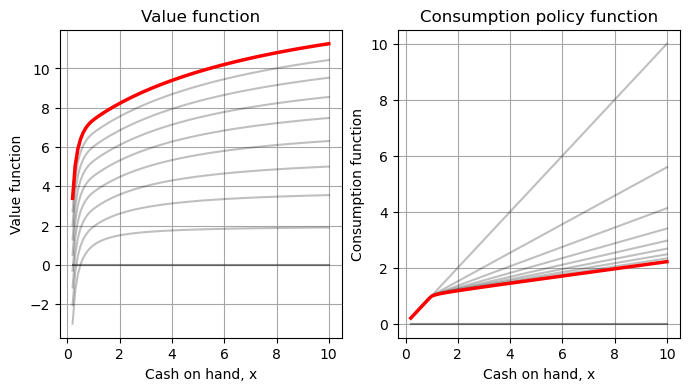

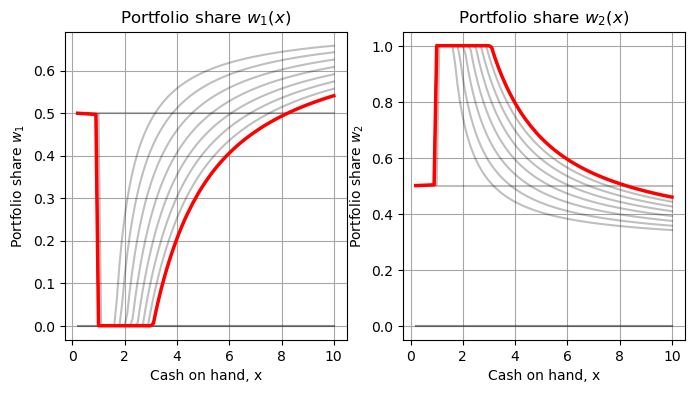

In [16]:
N=2  # Number of assets
mu_R = 1 + np.linspace(0.02, 0.03, N)  # expected returns
sigma = np.linspace(0.05, 0.15, N)     # standard dev on retuns
Sigma_R=build_sigma(sigma,c=0)         # Covarinace matrix on returs (correlation = c)
rho_y = np.zeros((N,1))                # Corelation between log(y) and R
# Initialize model
m1 = PortfolioChoiceModel(beta=0.95, gamma=2, rho_y=rho_y, mu_R=mu_R, Sigma_R=Sigma_R, n_x=100, n_rand=100, integration_rule="sobol")
# print(m1)  # uncomment to inspect model parameters
V, policy = dpsolver.vfi_T(m1, T=10); 
v_c_plot(m1.x0, V, policy);
w_plot(m1.x0, V, policy);

## Precationary savings, diversification, risk aversion and no shorting

1. **Precautionary Savings**
    - Agents **save more when wealth is low** to smooth consumption.
    - CRRA utility makes **future consumption valuable**, leading to **self-insurance against shocks**.
    - **As wealth increases, the precautionary motive weakens** ⟶ higher consumption.

1. **Portfolio Allocation and Risk-Taking**
    - **At low `x`**, agents invest **all savings in the risky asset** (`w_2 = 1`).
    - **Wealth increases** ⟶ agents **gradually start investing in the safer asset** (`w_1 > 0`).
    - Matches **life-cycle portfolio theory**: Young investors take risks, older investors de-risk.

1. **Time Horizon & Risk Exposure**
    - Risk exposure **declines as `T` approaches**.
    - Near `T`, agents **focus on capital preservation** (limited time to recover losses).
    - **Decreasing Relative Risk Aversion (DARA)**: The richer you are, the less risk you take.
    
1. **What If Short-Selling Was Allowed?**
    - **Agents would short `w_1` to increase `w_2`, amplifying risk.**  
    - **Early-life volatility would rise, but so would expected returns.**  
    - **Shorting constraint acts as an implicit borrowing limit.**  

## **Computational Challenges in Dynamic Portfolio Choice (1/2)**

**1. Curse of dimensionality is limited for our model**  
- **Only state variable: Cash-on-hand**.  
- **BUT: Curse of dimensionality easily kicks in for relevant extensios**
    - Serially correlated income ⟶ $\boldsymbol{y_t}$ becomes a state varible ($1$ addtitional state variable)
    - Serially correlated asset returns ⟶ $\boldsymbol{R_t}$ becomes a state varible ($N$ addtitional state variables)
    - Transactions costs ⟶ $\boldsymbol{w_{t-1}}$ becomes a state variable ($N-1$ addtitional state variables)
    - **Curse of dimensionality**:  increase the state space  ⟶ exponential increase in computational complexity

**2. Solving the Optimization Problem - repeated at Every Grid Point**  
   - **Portfolio weights must sum to 1** and **stay non-negative** ⟶ constrained optimization.  
   - **SLSQP works but is sensitive to initial guesses**.  
   - **Trust-constr is more robust but slower**.  
   - **Endogenous Grid Method (EGM) avoids repeated optimizations**:  
     - **Compute a grid over end-of-period assets**.  
     - **Invert Euler equation analytically to find consumption**.  
     - **Portfolio weights can be precomputed and interpolated**.  
     - We will cover **EGM later**.

## **Computational Challenges in Dynamic Portfolio Choice (2/2)**
**3. Interpolation of Highly Curved Functions**  
   - The **value function is highly curved** (goes to $ -\infty $ as $ c \to 0 $).  
   - **Linear interpolation introduces kinks**; cubic interpolation helps and **requires fewer points**.  
   - **Better: Time iteration on the Euler equation**  
     - **Interpolate the policy function (consumption), which has less curvature**.
     - We will cover **time iterations later**.

**4. Numerical Integration Trade-offs**  
   - **Monte Carlo breaks the curse of dimensionality** but introduces noise.  
   - **Quadrature is more accurate** but computationally expensive.  
   - **If interpolated value function has kinks, more integration points smooth expectations** but slow convergence.

**5. Stability, Speed, and Parallelization**  
   - **Fine grids improve accuracy but slow computation.**  
   - **Relaxing solver tolerances speeds up convergence but risks imprecision.**  
   - **Parallelization:**  
     - **Loops over states and integration can be parallelized**.  
     - **Analytical derivatives in optimization improve speed and accuracy**.